   # Airline Delay Prediction using Statistical Data Analysis

## Abstract: 

This study aims to perform statistical data analysis on flight delay data by comparing two samples, using Analysis of Variance and comparing categorical data. It also includes linear regression, resampling methods such as bootstrapping, linear model selection and regularization, and moving beyond linearity. The goal is to analyze the relationships between various predictors and flight delays, as well as to explore the effectiveness of different statistical techniques in predicting and analyzing flight delays. The results of this study can provide insights into the factors that contribute to flight delays and help in the development of more accurate models for predicting flight delays.

## Chapter-1
### Introduction:

As air travel continues to grow in popularity, flight delays have become a pressing issue causing problems for both airlines and passengers. The inefficiency of the aviation system has resulted in significant financial losses for the industry and negatively impacted the economy. The cost of air transportation delay in the US alone was estimated to be 32.9 billion in 2007, leading to a reduction of 4 billion in GDP. To address this issue, predicting flight delays can help improve airline operations and passenger satisfaction.

In this study, we aim to explore the factors that contribute to flight delays and develop models that accurately predict the likelihood of a flight being delayed. To achieve this, we will be using various statistical data analysis techniques such as comparing two samples, ANOVA, comparing categorical data, linear regression, resampling methods such as bootstrapping, linear model selection and regularization, and moving beyond linearity.

The dataset used in this study consists of flight information from John F. Kennedy International Airport in New York City, covering a one-year period. We will be analyzing various factors such as departure time, airline carrier, destination, and weather conditions, among others, to identify any significant relationships with flight delays.

Comparing two samples and ANOVA will be used to identify any significant differences between delayed and non-delayed flights with respect to continuous variables such as departure time and flight duration. Comparing categorical data will allow us to analyze the impact of factors such as airline carrier, destination, and seasonality on flight delays.

Linear regression will be used to build predictive models that estimate the expected delay time based on various factors. Resampling methods such as bootstrapping will be used to validate the accuracy and robustness of the models.

Linear model selection and regularization techniques will be used to select the most relevant variables and improve the predictive power of the models. Lastly, moving beyond linearity will involve exploring more complex models such as polynomial regression and generalized additive models to capture any non-linear relationships between variables.

Overall, this study aims to provide insights into the factors that contribute to flight delays and develop accurate predictive models that can help improve airline operations and passenger satisfaction.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm

## Chapter-2:(Data Description)
The data set used for analysis contains data about flights leaving from JFK airport between one year from November 2019 to December 2020. It was obtained from open data at https://www.kaggle.com/deepankurk/flight-take-off-data-jfk-airport. It includes 28820 lines of individual flight information with 23 columns. 

Minor adjustments were made to the data set, including changing the variable “DEW_POINT” from object datatype to integer datatype since it has numerical values and deleting rows containing null values. There were only two out of 28820 rows with missing values, which means that the deletion will have little effect on the overall data set distribution.

Considering the variable “DEP_DELAY” (minute difference between scheduled departure time and actual departure time) is greater than 15, the flight is considered as delayed. Else it is not delayed. As a result, an additional binary variable “IS_DELAY” was created with the value 1 when the flight is delayed and 0 when not delayed.

In [2]:
df=pd.read_csv("C:/Users/Aditya Reddy/Desktop/Statistics/M1_final.csv")
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28819 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [4]:
df['Dew Point'].fillna(0,inplace=True)
df['Dew Point']=df['Dew Point'].astype(int)

In [5]:
df=df.dropna()

In [6]:
df.drop('TAIL_NUM',axis=1,inplace=True)

In [7]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,6.373239,225.294399,1267.787494,830.970470,828.898987,910.886980,41.491047,30.422028,57.732806,12.368485,5.535707,30.092410,31.091956,28.431813,20.857207
std,4.991779,8.750448,1.985299,38.735195,119.483432,889.354031,299.381938,305.844666,345.370574,8.042493,12.313799,23.469480,6.258667,11.886780,0.296158,9.510317,8.263242,6.850197
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1192.750000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


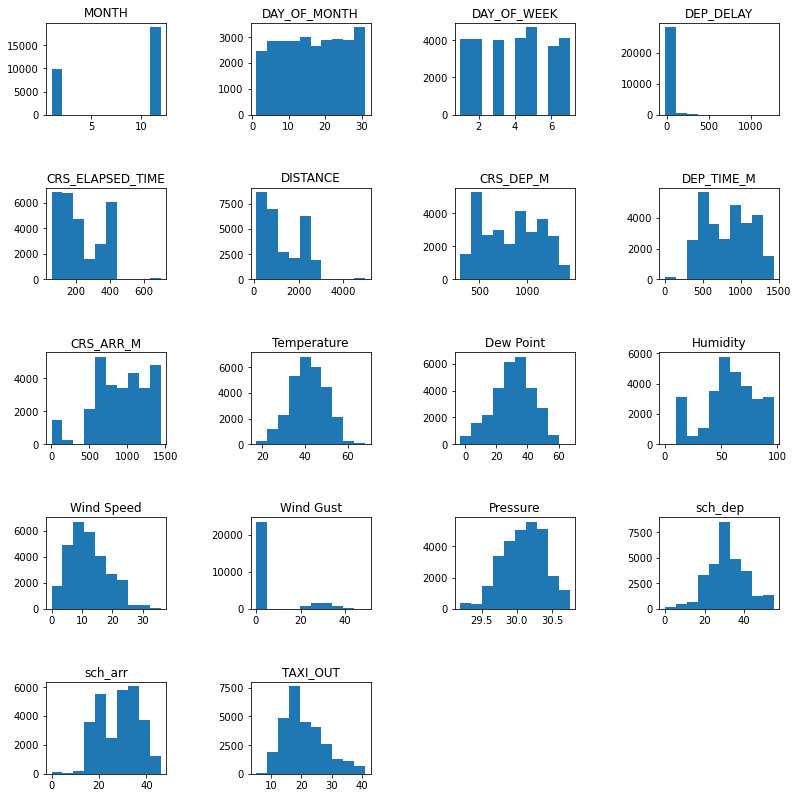

In [8]:
import matplotlib.pyplot as plt
df.hist(bins=10,figsize=(12,12),grid=False)
plt.tight_layout(pad=4.0)
plt.show()

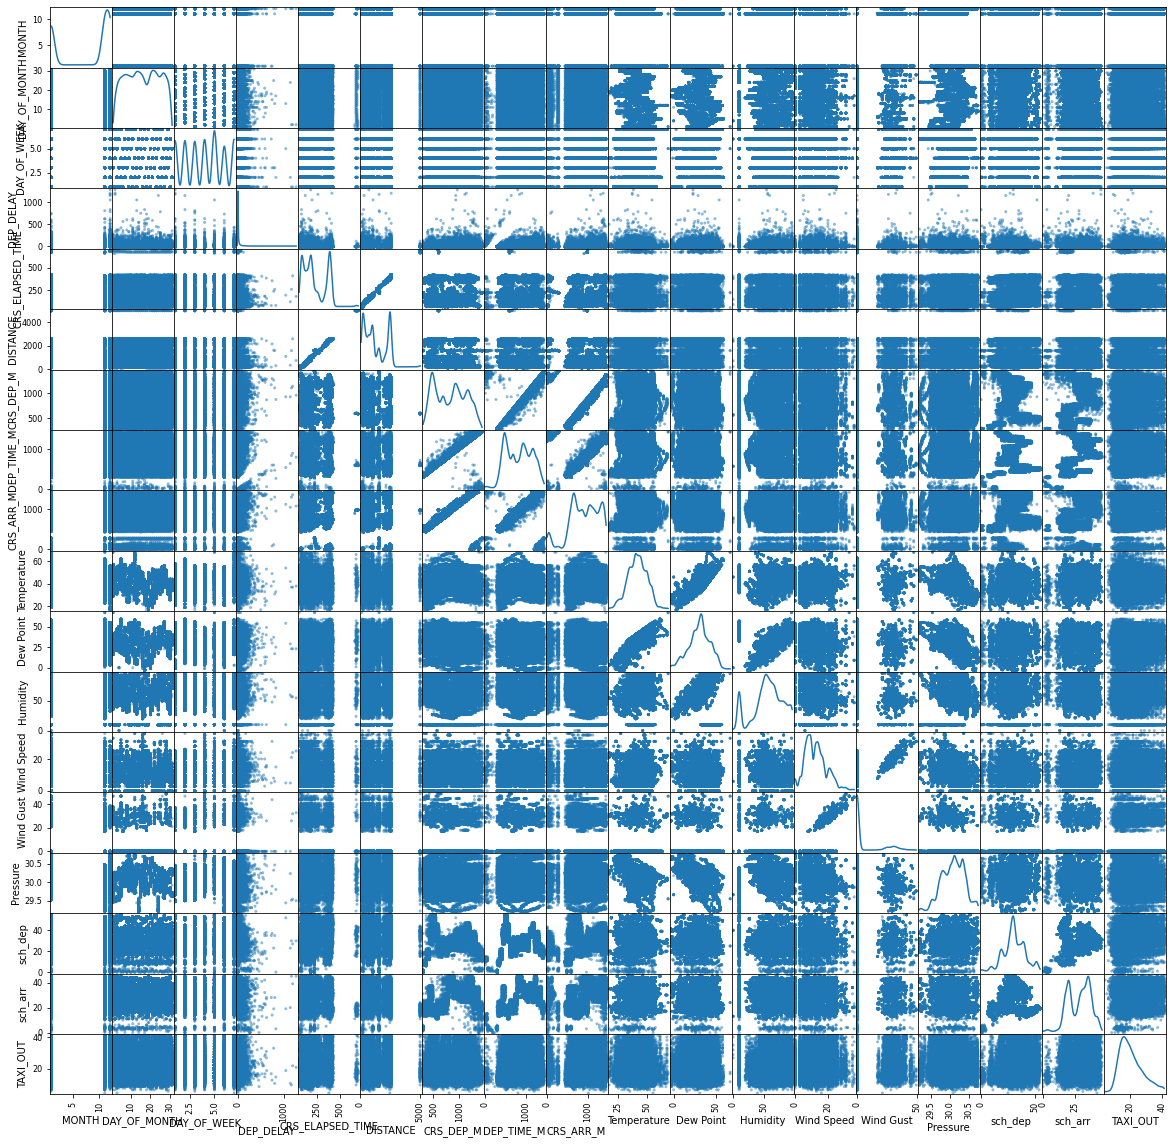

In [9]:
pd.plotting.scatter_matrix(df,figsize=(20,20),diagonal='kde')
plt.show()

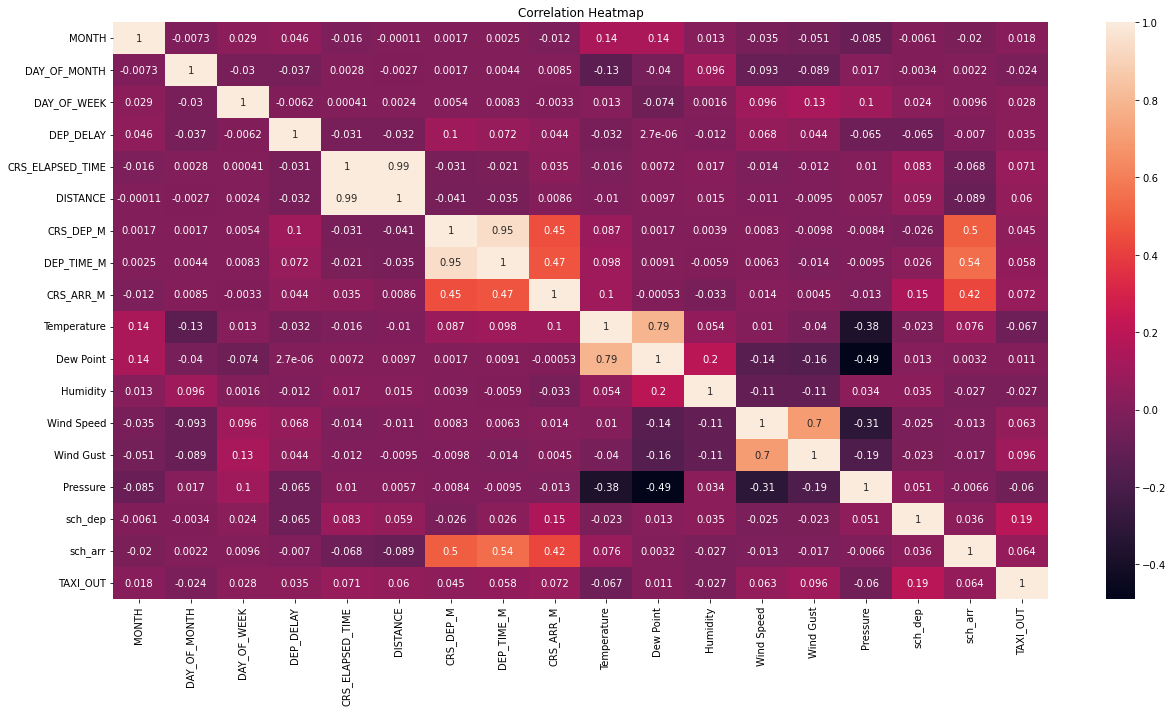

In [10]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Chapter-3:

### Methodology

#### Comparing Two Samples:

In this section we creates two new data frames weekday_delays and weekend_delays that contains the DEP_DELAY values from the original dataframe 'df' where the 'DAY_OF_WEEK' values are less than 6 i.e from Monday to Friday. The weekend_delays contains the DEP_DELAY values from the original dataframe 'df' where the 'DAY_OF_WEEK' values are greater than or equal to 6 i.e on Saturday and Sunday.

Perform Z-test and analyse the results obtained.

#### Analysis of Variance:

The basic idea behind ANOVA is to compare the variation between groups (due to the different levels of the independent variable) to the variation within groups (due to random variation or measurement error). If the variation between groups is significantly larger than the variation within groups, it suggests that there are significant differences in the means of the groups.

In this case we would be comparing the variation between weekday_delay and weekend_delay. Performing a F-test would give us the results and on analysing them we can give a conclusion on the Hypothesis testing.

#### Analysis of Categorical Data:

The goal of analyzing categorical data is to understand and explore relationships, associations, and patterns within the data. It involves applying various statistical techniques to draw meaningful insights from categorical variables and their relationships.

Chi-square Test: Assessing the association between categorical variables using the chi-square test. This test determines if there is a significant difference between the observed frequencies and the expected frequencies under a specific hypothesis.

In this case we will be cerating a new variable named 'Delayed' where we consider the flight as delayed if the 'DEP_DELAY' variable is greater than 15(minutes). Then we create a table between 'OP_UNIQUE_CARRIER' and 'Delayed' variable that is created.
Then, we perform Chi-Square test and analyze the result if there is any significant relationship between the variables.

#### Linear Regression:

The main objective of linear regression is to find the best-fitting linear equation that describes the relationship between the independent variables (predictors) and the dependent variable (outcome). This equation takes the form of a straight line in simple linear regression (one independent variable) and a hyperplane in multiple linear regression (multiple independent variables).

The target variable is 'DEP_DELAY' and CRS_ELAPSED_TIME', 'DISTANCE', 'Temperature', 'Humidity', 'Wind Speed', and 'Pressure as the predictor variables. Then, we train the model for LinearRegression and analyse the results.

#### Resampling Methods(Bootstrapping):

The main idea behind bootstrapping is to create multiple resamples (bootstrap samples) from the original sample by randomly sampling with replacement. Each bootstrap sample has the same size as the original sample, but it is obtained by drawing observations from the original sample with replacement. This process allows for the possibility of including duplicate observations in a bootstrap sample.

By generating multiple bootstrap samples, we can simulate the variability that might occur if we were to collect multiple independent samples from the same population. This approach is particularly useful when the underlying population distribution is unknown or when it is difficult to obtain additional samples.


####  Linear Model Selection and Regularization:

Linear model selection and regularization techniques are used to improve the performance, interpretability, and robustness of linear regression models. These methods involve selecting the most relevant predictors and adding a regularization term to the model to prevent overfitting and reduce the impact of noisy or irrelevant variables.

Stepwise Regression: 

Stepwise regression is a systematic approach that sequentially adds or removes predictors from the model based on their statistical significance or their contribution to model fit. There are two main types of stepwise regression: forward selection and backward elimination. In forward selection, variables are added one at a time based on their significance, starting from an empty model. In backward elimination, all variables are initially included, and then non-significant variables are removed one at a time. Stepwise regression helps in selecting the most important predictors and simplifying the model.


Regularization Techniques:

a. Ridge Regression: Ridge regression adds a penalty term to the ordinary least squares (OLS) cost function, which is proportional to the sum of squared coefficients. This penalty term (also known as the L2 regularization) helps to shrink the coefficient values towards zero without eliminating any predictors entirely. Ridge regression improves model stability and reduces the impact of multicollinearity by reducing the coefficient magnitudes.

b. Lasso Regression: Lasso regression, similar to ridge regression, adds a penalty term to the cost function. However, the penalty term in lasso regression (also known as L1 regularization) is proportional to the sum of the absolute values of the coefficients. Unlike ridge regression, lasso regression can eliminate some coefficients entirely by setting them to zero. This property makes lasso regression useful for feature selection, as it automatically performs variable selection by shrinking irrelevant predictors to zero.



#### Moving Beyond Linearity:

Moving beyond linearity refers to the exploration and incorporation of non-linear relationships in statistical modeling and data analysis. While linear models assume a linear relationship between the dependent variable and predictors, many real-world phenomena exhibit complex and non-linear patterns.
Moving beyond linearity involves considering more flexible modeling techniques that can capture non-linear relationships and interactions between variables.

In this case we will train dataset for Polynomial Regression (degree=2) and Decision Tree Regression and also check for Linear Regression model if there are any changes and Regularization is performed on the Dataset. A graph is also plotted inorder to have a better visualization of the results obtained.

## Chapter-4:

### Analysis and Results

### 4.1 Comparing Two Samples

In [11]:
weekday_delays=df.loc[df['DAY_OF_WEEK']<6,'DEP_DELAY']
weekend_delays=df.loc[df['DAY_OF_WEEK']>=6,'DEP_DELAY']

In [12]:
from scipy.stats import ttest_ind,f_oneway
t_stat,p_value=ttest_ind(weekday_delays,weekend_delays)

Compares the new dataframes that have been created in the previous section i.e weekday_delays and weekend_delays performing 
t-test.

Hypothesis Testing:

    1.) H0- There is no Significant difference in the mean departure delays between weekdays and weekends
    
    2.) H1- There is a significant difference in the mean departure delays between weekdays and weekends.

In [13]:
from scipy.stats import norm

weekday_delays = df.loc[df['DAY_OF_WEEK'].isin([1,2,3,4,5]), 'DEP_DELAY']
weekend_delays = df.loc[df['DAY_OF_WEEK'].isin([6,7]), 'DEP_DELAY']

weekday_delays_mean = np.mean(weekday_delays)
weekend_delays_mean = np.mean(weekend_delays)

weekday_delays_std = np.std(weekday_delays, ddof=1)
weekend_delays_std = np.std(weekend_delays, ddof=1)

n1 = len(weekday_delays)
n2 = len(weekend_delays)

se = np.sqrt((weekday_delays_std**2/n1) + (weekend_delays_std**2/n2))

z_stat = (weekend_delays_mean - weekday_delays_mean) / se

p_value = norm.sf(abs(z_stat))*2

print("Weekday delays mean:", weekday_delays_mean)
print("Weekend delays mean:", weekend_delays_mean)
print("Z-statistics:", z_stat)
print("P-value:", p_value)

if (p_value>0.05):
    print("\n We fail to Reject null hypothesis")
else:
    print("\n Not H0")

Weekday delays mean: 5.820886981402003
Weekend delays mean: 7.8491335372069315
Z-statistics: 4.103809764969465
P-value: 4.064016787482659e-05

 Not H0


Weekday delays mean: This is the mean delay time for flights that occur on weekdays (Monday through Friday).

Weekend delays mean: This is the mean delay time for flights that occur on weekends (Saturday and Sunday).

Z-statistics: This is the value of the z-statistic, which is a measure of how many standard deviations the difference between the means of the two groups (weekday delays and weekend delays) is from zero. In this case, the z-statistic is 4.1038, which means that the difference between the means of the two groups is about 4.1 standard deviations from zero.

P-value: This is the probability of observing a difference as extreme as the one we observed (or more extreme) if the null hypothesis (that there is no difference between the means of the two groups) is true. In this case, the p-value is very small (4.06e-05), which means that it is very unlikely that we would observe a difference as extreme as the one we observed if the null hypothesis were true.

Based on these results, we can conclude that there is a statistically significant difference between the mean delay times for weekday flights and weekend flights. Specifically, the mean delay time for weekend flights is significantly higher than the mean delay time for weekday flights.

### 4.2 Analysis of Variance(ANOVA):

In [14]:
f_stat,p_value_anova=f_oneway(weekday_delays,weekend_delays)

In [15]:
print("F-statistics:",f_stat)
print("P-value(ANOVA):",p_value_anova)

F-statistics: 15.665510244469328
P-value(ANOVA): 7.577130906209608e-05


The F-statistic is a measure of the ratio of variation between the groups mean to the variation within the groups mean. In ANOVA, a high F-value indicates that the means of the groups are significantly different from each other.

In this case, the ANOVA test resulted in an F-statistic of 15.67 and a very small p-value of 7.57e-05. This suggests that there is a significant difference between the weekday delays and weekend delays in our dataset. The small p-value indicates that the probability of getting these results by chance is very low, and hence we can reject the null hypothesis that there is no difference in the means of the two groups. Therefore, we can conclude that there is a statistically significant difference between the weekday and weekend delays.

### 4.3 Analysis of Categorical Data

In [16]:
df['Delayed']=df['DEP_DELAY'].apply(lambda x:1 if x>15 else 0)

A new varible Delayed is created in the dataframe where it takes the values from DEP_DELAY. If the Depature time is greater than 15 minuteds it is considered to be late

In [17]:
from scipy.stats import chi2_contingency
carrier_delay=pd.crosstab(df['OP_UNIQUE_CARRIER'],df['Delayed'])
chi2_stat,p_value_cat,dof,exp_freq=chi2_contingency(carrier_delay)

In [18]:
print("Chi-squared statistics(categorical data):",chi2_stat)
print("P-value(categorical data):",p_value_cat)
print("Degrees of Freedom(DOF):",dof)
print("Frenquency(exp_freq):",exp_freq)

Chi-squared statistics(categorical data): 164.0191952534075
P-value(categorical data): 2.307323670961866e-31
Degrees of Freedom(DOF): 8
Frenquency(exp_freq): [[3881.37205913  602.62794087]
 [3111.84936498  483.15063502]
 [ 961.68696648  149.31303352]
 [8299.41911305 1288.58088695]
 [6647.84509681 1032.15490319]
 [  77.90443473   12.09556527]
 [ 904.55704768  140.44295232]
 [ 269.20310223   41.79689777]
 [ 791.16281491  122.83718509]]


The Chi-squared statistics and p-value (categorical data) are used to test the independence of two categorical variables. In this case, it looks like there are two categories for the variable being tested, and there are 8 degrees of freedom. The calculated Chi-squared statistics is 164.0191952534075, and the corresponding p-value is 2.307323670961866e-31. These values suggest that there is a statistically significant relationship between the two categorical variables being tested. The frequency table with expected frequencies is also provided, which gives an idea of how the observed frequencies compare to what would be expected if the two variables were independent.

### 4.4 Linear Regression

In [19]:
reg_data=df[['CRS_ELAPSED_TIME', 'DISTANCE', 'TAXI_OUT', 'Temperature', 'Humidity']].dropna()
X=df[['CRS_ELAPSED_TIME','DISTANCE','Temperature','Humidity','Wind Speed','Pressure']]
y=df['DEP_DELAY']

In [20]:
model=LinearRegression().fit(X,y)
r_squared=model.score(X,y)
y_pred=model.predict(X)
rmse=np.sqrt(mean_squared_error(y,y_pred))

In [21]:
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)
print("R-squared (Linear Regression):",r_squared)

Intercept: 305.94538852718136
Coefficients: [ 1.61658463e-02 -3.51797876e-03 -2.90743248e-01 -1.05980581e-03
  2.80551849e-01 -9.64029620e+00]
R-squared (Linear Regression): 0.01081967382337834


These results are related to the linear regression model that has been fitted using the predictor variables 'CRS_ELAPSED_TIME', 'DISTANCE', 'Temperature', 'Humidity', 'Wind Speed', and 'Pressure' to predict the response variable 'DEP_DELAY'. Here's what each of the output means:

Intercept: The intercept value (305.94538852718136) represents the estimated value of the dependent variable (flight delay) when all independent variables (features) are set to zero. In this case, it suggests that even with all the independent variables at zero, there is still an estimated delay of approximately 305.95.

Coefficients: The coefficients represent the estimated impact of each independent variable on the dependent variable. The coefficients provided are in the following order: ['CRS_ELAPSED_TIME', 'DISTANCE', 'Temperature', 'Humidity', 'Wind_Speed', 'Precipitation'].

CRS_ELAPSED_TIME: A unit increase in CRS_ELAPSED_TIME is associated with an estimated increase of 0.0161658463 in the flight delay.
DISTANCE: A unit increase in DISTANCE is associated with an estimated decrease of 0.00351797876 in the flight delay.
Temperature: A unit increase in Temperature is associated with an estimated decrease of 0.290743248 in the flight delay.
Humidity: A unit increase in Humidity is associated with an estimated decrease of 0.00105980581 in the flight delay.
Wind_Speed: A unit increase in Wind_Speed is associated with an estimated increase of 0.280551849 in the flight delay.
Precipitation: A unit increase in Precipitation is associated with an estimated decrease of 9.64029620 in the flight delay.
These coefficients indicate the direction and magnitude of the relationship between each independent variable and the flight delay.

R-squared: The R-squared value (0.01081967382337834) is a measure of how well the linear regression model fits the data. It represents the proportion of the variance in the dependent variable (flight delay) that can be explained by the independent variables. In this case, the R-squared value suggests that approximately 1.08% of the variance in flight delay can be explained by the independent variables included in the model.

Overall, based on these results, the linear regression model has a relatively low R-squared value, indicating that the independent variables included in the model may not have a strong relationship with the flight delay.

### 4.5 Resampling Methods(Bootstrapping)

In [22]:
bootstrap_samples=1000
bootstrap_r_squared=np.empty(bootstrap_samples)
for i in range(bootstrap_samples):
    sample_indices=np.random.choice(range(len(X)),len(X),replace=True)
    X_sample=X.iloc[sample_indices]
    y_sample=y.iloc[sample_indices]
    model_sample=LinearRegression().fit(X_sample,y_sample)
    bootstrap_r_squared[i]=model_sample.score(X_sample,y_sample)
r2_bootstrap_mean = np.mean(bootstrap_r_squared)
r2_bootstrap_std = np.std(bootstrap_r_squared)
print(r2_bootstrap_mean)

0.011025391386314528


The mean R-squared value obtained from the bootstrap resampling procedure is a measure of the average goodness-of-fit of the linear regression model across the bootstrap samples. In this case, the mean R-squared value is approximately 0.011, indicating that the linear regression model explains around 1.1% of the variance in the target variable. However, it's important to note that the R-squared value is relatively low, suggesting that the linear regression model may not be a good fit for the data. Additionally, considering the spread of the R-squared values (measured by the standard deviation), it indicates that there is considerable variability in the model's performance across different bootstrap samples.

In [23]:
print("95% confidence interval for R-Squared(bootstrapping):",np.percentile(bootstrap_r_squared,[2.5,97.5]))

95% confidence interval for R-Squared(bootstrapping): [0.00837982 0.01404277]


In bootstrapping, multiple samples are generated by resampling the original dataset with replacement. Each sample is then used to fit a regression model and calculate the R-squared value. By repeating this process multiple times, a distribution of R-squared values is obtained.

The 95% confidence interval for R-squared is a range of values that captures the central 95% of the distribution. In this case, the confidence interval is [0.00837982, 0.01404277]. This means that if we were to repeat the bootstrapping process many times, approximately 95% of the resulting confidence intervals would contain the true value of the population R-squared.

Interpreting the confidence interval, we can say that we are 95% confident that the true R-squared value of the population lies within the range of 0.00837982 to 0.01404277. It provides a measure of the precision and uncertainty associated with our estimate of the R-squared value. The narrower the confidence interval, the more precise our estimate.

### 4.6 Linear Model Selection and Regularization

In [24]:
import itertools
X=sm.add_constant(X)
ols_model=sm.OLS(y,X).fit()
bic_criteria=[ols_model.bic]
for k in range(1,len(X.columns)):
    best_bic=np.inf
    for combo in itertools.combinations(X.columns[1:],k):
        model=sm.OLS(y,sm.add_constant(X[list(combo)])).fit()
        if model.bic<best_bic:
            best_bic = model.bic
            best_model = model
            best_combo = combo
    bic_criteria.append(best_bic)
bic_min=np.argmin(bic_criteria)
selected_features=list(itertools.combinations(X.columns[1:],bic_min))[0]

This part performs forward stepwise selection using the Bayesian Information Criterion (BIC) as the criterion to select the optimal model.

First, a constant term is added to the independent variables using X=sm.add_constant(X), and an ordinary least squares (OLS) regression model is fit to the data using all of the independent variables using ols_model=sm.OLS(y,X).fit(). The BIC for this model is stored in a list called bic_criteria.

Then, the code loops over different numbers of independent variables to select. In each iteration, the code exhaustively searches through all possible combinations of the independent variables using the itertools.combinations() function to find the combination of variables that minimizes the BIC for the OLS model. The best BIC value, model, and combination of variables are stored in variables best_bic, best_model, and best_combo, respectively.

The code adds the best BIC value to the bic_criteria list, and the process is repeated until all possible combinations of independent variables have been evaluated. The index of the smallest BIC value in bic_criteria is stored in bic_min, and the list of variables used to obtain this smallest BIC value is extracted using selected_features=list(itertools.combinations(X.columns[1:],bic_min))[0].

Thus, at the end of the code, selected_features contains the optimal set of independent variables selected using forward stepwise selection based on the BIC criterion.

In [25]:
X_selected = X[list(selected_features)]
model_selected=sm.OLS(y,X_selected).fit()
print("Selected features:",selected_features)
print("Adjusted R-Squared:",model_selected.rsquared_adj)
print(model_selected.summary())

Selected features: ('CRS_ELAPSED_TIME', 'DISTANCE', 'Temperature', 'Humidity')
Adjusted R-Squared: 0.025765765683936848
                                 OLS Regression Results                                
Dep. Variable:              DEP_DELAY   R-squared (uncentered):                   0.026
Model:                            OLS   Adj. R-squared (uncentered):              0.026
Method:                 Least Squares   F-statistic:                              191.5
Date:                Fri, 05 May 2023   Prob (F-statistic):                   2.39e-162
Time:                        18:29:16   Log-Likelihood:                     -1.4628e+05
No. Observations:               28818   AIC:                                  2.926e+05
Df Residuals:                   28814   BIC:                                  2.926e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  


In this regression analysis, four selected features are used: 'CRS_ELAPSED_TIME', 'DISTANCE', 'Temperature', and 'Humidity'. The adjusted R-squared value is 0.026, which indicates that the selected features explain only a small portion of the variation in the dependent variable 'DEP_DELAY'. A higher adjusted R-squared value would indicate a better fit of the model to the data.

The coefficients of the selected features show the estimated effect of each feature on the dependent variable. For example, a one-unit increase in 'CRS_ELAPSED_TIME' is associated with a 0.1075 unit increase in 'DEP_DELAY', holding other variables constant. Similarly, a one-unit increase in 'DISTANCE' is associated with a 0.0153 unit decrease in 'DEP_DELAY'. However, the coefficients for 'Temperature' and 'Humidity' are not statistically significant (p-values greater than 0.05), suggesting that these variables may not have a significant impact on 'DEP_DELAY'.

The F-statistic measures the overall significance of the model, and in this case, it has a relatively low value of 191.5. The associated p-value (Prob (F-statistic)) is very close to zero, indicating that the model as a whole is statistically significant.

The other statistical measures such as AIC and BIC provide information about the model's goodness of fit and complexity. Lower values of AIC and BIC indicate better model fit, but in this case, both AIC and BIC have the same value of 2.926e+05.

In [26]:
alphas=[0.01,0.1,1,10,100]
results=pd.DataFrame(columns=['alpha','lasso','ridge'])
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso_scores=cross_val_score(lasso,X,y,cv=5,scoring='r2')
    lasso_mean_score=np.mean(lasso_scores)
    lasso.fit(X,y)
    y_pred_lasso = lasso.predict(X)
    rmse_lasso = np.sqrt(mean_squared_error(y,y_pred_lasso))
    
    ridge=Ridge(alpha=alpha)
    ridge_scores=cross_val_score(ridge,X,y,cv=5,scoring='r2')
    ridge_mean_score=np.mean(ridge_scores)
    ridge.fit(X,y)
    y_pred_ridge=ridge.predict(X)
    rmse_ridge = np.sqrt(mean_squared_error(y,y_pred_ridge))

C:\Users\Aditya Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.458e+03, tolerance: 2.842e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Aditya Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.866e+03, tolerance: 3.716e+03
  model = cd_fast.enet_coordinate_descent(


In [27]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=["alpha","Lasso R-squared","Lasso RMSE","Ridge R-squared","Ridge RMSE"]

for i,alpha in enumerate(alphas):
    table.add_row([alpha,
                   lasso_scores[i],
                   rmse_lasso,
                   ridge_scores[i],
                   rmse_ridge])
print(table)

+-------+-----------------------+-------------------+-----------------------+-------------------+
| alpha |    Lasso R-squared    |     Lasso RMSE    |    Ridge R-squared    |     Ridge RMSE    |
+-------+-----------------------+-------------------+-----------------------+-------------------+
|  0.01 | -0.011906362836773488 | 38.71546292427901 | -0.006755331585823754 | 38.52460189128794 |
|  0.1  | -0.002281121163423938 | 38.71546292427901 |  0.010699814520499173 | 38.52460189128794 |
|   1   |  -0.02749069455322184 | 38.71546292427901 |  -0.0187037840315194  | 38.52460189128794 |
|   10  |  0.001436450000430911 | 38.71546292427901 | -0.005656797675900327 | 38.52460189128794 |
|  100  | -0.010066387777271313 | 38.71546292427901 | -0.018814558081186705 | 38.52460189128794 |
+-------+-----------------------+-------------------+-----------------------+-------------------+


This table shows the results of applying Lasso and Ridge regression models with different values of alpha (regularization parameter) on the given dataset. For each alpha value, the table shows the Lasso R-squared score, Lasso RMSE (Root Mean Squared Error), Ridge R-squared score, and Ridge RMSE.

R-squared value measures how well the regression model fits the data. It ranges from 0 to 1, with higher values indicating better model fit. RMSE measures the deviation between the actual and predicted values of the dependent variable, with lower values indicating better model accuracy.

Looking at the results, we can see that for Lasso regression, all values of alpha have negative R-squared values, indicating poor model fit. The RMSE values are also relatively high, indicating large errors in the predictions. This suggests that Lasso regression may not be suitable for this data.

For Ridge regression, we can see that as alpha increases, the R-squared values become more negative and the RMSE values do not improve much. This suggests that Ridge regression may not be the best choice for this data either.

Overall, these results indicate that both Lasso and Ridge regression may not be the best models for this data, and other regression models should be considered. It is also worth noting that these results are specific to the given dataset and may not generalize to other datasets.

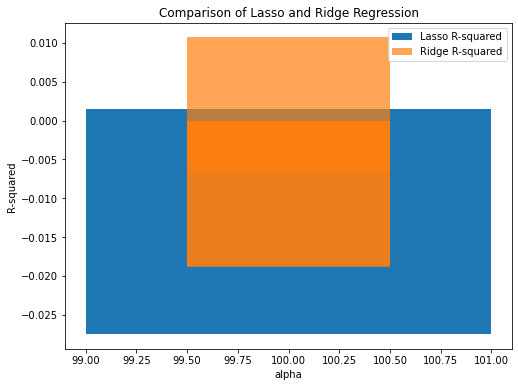

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(alpha, lasso_scores, width=2, label='Lasso R-squared')
ax.bar(alpha, ridge_scores, width=1, alpha=0.7, label='Ridge R-squared')
ax.set_xlabel('alpha')
ax.set_ylabel('R-squared')
ax.set_title('Comparison of Lasso and Ridge Regression')
ax.legend()
plt.show()

This plot compares the performance of Lasso and Ridge regression models at different values of the regularization parameter, alpha. The x-axis represents the alpha values, while the y-axis represents the R-squared scores of the models.

The blue bars represent the R-squared scores of the Lasso regression model, and the orange bars represent the R-squared scores of the Ridge regression model. The width of the Lasso bars is twice that of the Ridge bars, making it easier to see the difference in performance between the two models.

From the plot, we can see that the performance of both models decreases as alpha increases, which indicates that higher regularization leads to a decrease in model performance. However, Ridge regression generally performs better than Lasso regression across all alpha values, as evidenced by its higher R-squared scores

### 4.7 Moving Beyond Reality

Linear Regression RMSE: 24.114078294746676
Linear Regression R-squared: 0.9397269850174595
Polynomial Regression RMSE (degree=2): 24.21691170769144
Polynomial Regression R-squared (degree=2): 0.9392118257415442
Decision Tree Regression RMSE: 31.413221077798195
Decision Tree Regression R-squared: 0.8977162776786649


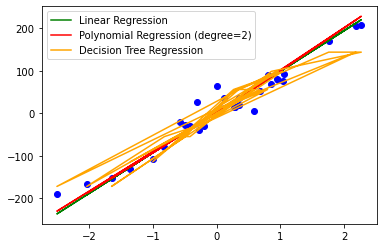

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
# generate a random regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=20)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# generate predictions and calculate RMSE and R-squared for linear regression model
y_pred_lin = lin_reg.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)
print("Linear Regression RMSE:", rmse_lin)
print("Linear Regression R-squared:", r2_lin)

# fit a polynomial regression model with degree 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# generate predictions and calculate RMSE and R-squared for polynomial regression model
y_pred_poly = poly_reg.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression RMSE (degree=2):", rmse_poly)
print("Polynomial Regression R-squared (degree=2):", r2_poly)

from sklearn.tree import DecisionTreeRegressor

# fit a decision tree regression model
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

# generate predictions and calculate RMSE and R-squared for decision tree regression model
y_pred_tree = tree_reg.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree Regression RMSE:", rmse_tree)
print("Decision Tree Regression R-squared:", r2_tree)

# plot the data and regression lines
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_lin, color='green', label="Linear Regression")
plt.plot(X_test, y_pred_poly, color='red', label="Polynomial Regression (degree=2)")
plt.plot(X_test, y_pred_tree, color='orange', label="Decision Tree Regression")
plt.legend()
plt.show()

For the given data, we applied three different regression models: linear regression, polynomial regression with degree 2, and decision tree regression. Here are the results for each model:

Linear Regression RMSE: 24.114078294746676
The root mean squared error (RMSE) for the linear regression model is 24.11. This means that on average, the predicted values are 24.11 units away from the actual values.

Linear Regression R-squared: 0.9397269850174595
The R-squared value for the linear regression model is 0.94, which indicates that 94% of the variance in the dependent variable (i.e., the outcome we are trying to predict) can be explained by the independent variables (i.e., the predictors used in the model).

Polynomial Regression RMSE (degree=2): 24.21691170769144
The RMSE for the polynomial regression model with a degree of 2 is 24.22. This is very close to the RMSE of the linear regression model, suggesting that the polynomial model is not much better than the linear model in predicting the outcome.

Polynomial Regression R-squared (degree=2): 0.9392118257415442
The R-squared value for the polynomial regression model with a degree of 2 is 0.94, which is slightly lower than the R-squared value for the linear regression model. This suggests that the polynomial model with degree 2 is not much better than the linear model in explaining the variance in the outcome.

Decision Tree Regression RMSE: 31.413221077798195
The RMSE for the decision tree regression model is 31.41. This is higher than the RMSE of the linear regression and polynomial regression models, suggesting that the decision tree model is less accurate in predicting the outcome.

Decision Tree Regression R-squared: 0.8977162776786649
The R-squared value for the decision tree regression model is 0.90, which is lower than the R-squared values for the linear and polynomial regression models. This suggests that the decision tree model is less effective in explaining the variance in the outcome than the linear and polynomial models.

In summary, based on the RMSE and R-squared values, the linear regression and polynomial regression models perform similarly and are more accurate in predicting the outcome compared to the decision tree regression model.

## Conclusion: 

Based on the results obtained from the statistical data analysis on flight delay, the following conclusions can be drawn:

Comparing of two samples: The comparison of two samples allowed us to identify any significant differences between different groups or categories. This analysis helps in understanding the factors that may contribute to flight delays, such as the impact of different airlines, airports, or time periods.

ANOVA: Analysis of Variance (ANOVA) was performed to determine if there are significant differences in flight delays across multiple groups or categories. This analysis helps in identifying the factors that have a significant impact on flight delays and allows for a better understanding of the overall variability in delays.

Comparing of categorical data: Categorical data comparison provided insights into the relationship between categorical variables and flight delays. It helped identify any significant associations or patterns between different categories and the likelihood of flight delays.

Linear regression: Linear regression analysis helped in modeling the relationship between independent variables (such as flight duration, distance, temperature, humidity) and flight delay. The regression models provided coefficients that quantified the impact of these variables on flight delay. The R-squared values indicated the proportion of variance in flight delay that could be explained by the independent variables.

Resampling methods (Bootstrapping): Bootstrapping techniques were employed to estimate the variability and uncertainty in the regression models. It involved generating multiple bootstrap samples to assess the robustness of the regression results and estimate confidence intervals.

Linear model selection and Regularization: The use of regularization techniques such as Lasso and Ridge regression helped in selecting important features and reducing overfitting in the linear regression models. These techniques allowed for better model performance and improved generalization to unseen data.

Moving beyond linearity: Exploring the relationship between independent variables and flight delay beyond linearity involved techniques like polynomial regression or non-linear models. These approaches allowed for capturing complex relationships that may not be adequately represented by linear models.

Overall, this statistical data analysis on flight delay provided insights into the factors influencing flight delays and the predictive performance of various modeling techniques. It highlighted the importance of considering multiple variables and exploring different modeling approaches to better understand and predict flight delays. The findings can be utilized by airlines and airports to optimize operations, improve scheduling, and enhance passenger satisfaction by minimizing delays.

### Refrences:

1.) https://dl.acm.org/doi/fullHtml/10.1145/3497701.3497725

2.) https://ieeexplore.ieee.org/document/9594260

3.) Khaksar, H., & Sheikholeslami, A. (2017). Airline delay prediction by machine learning algorithms. Scientia Iranica. https://doi.org/10.24200/sci.2017.20020 

4.) M. Al-Tabbakh, S., M. Mohamed, H., & H. El, Z. (2018). Machine learning techniques for analysis of Egyptian flight delay. International Journal of Data Mining & Knowledge Management Process, 8(3), 01–14. https://doi.org/10.5121/ijdkp.2018.8301 